NUMBER PRDICTION BY READING IMAGE

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
#reading image
import cv2 as cv
import numpy as np 
img=cv.imread("D:\study\ss1.png")
img=cv.resize(img,(28,28))
gray=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
grayy=np.array(gray)
grayy=255-grayy
cv.imshow("image",grayy)
cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
X_test[0]=grayy
Y_test[0]=3
print(X_test[0].shape)

(28, 28)


In [6]:
Y_train.shape

(60000,)

label: 3


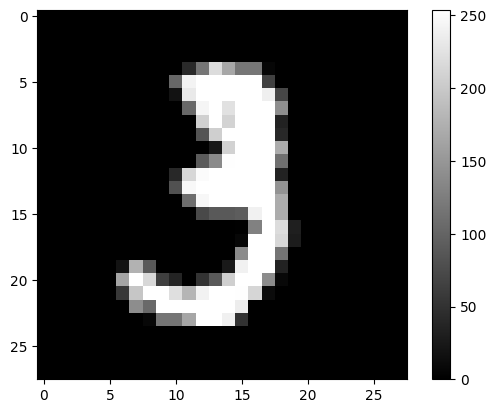

In [7]:
i=10
# plt.figure(figsize=(2,2))
plt.imshow(X_train[i],cmap='gray')
plt.colorbar()
# plt.grid(True)
print("label:",Y_train[i])
plt.show()

In [8]:
#model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [9]:
#compiling
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
print(X_train[0])
print(Y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [9]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2750 - accuracy: 0.8552
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3868 - accuracy: 0.9105
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2818 - accuracy: 0.9290
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2430 - accuracy: 0.9387
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2283 - accuracy: 0.9415
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2110 - accuracy: 0.9460
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1984 - accuracy: 0.9503
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1914 - accuracy: 0.9526
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1909 - accuracy: 0.9534
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.180

In [10]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
print('\nTest accuracy: {:.2f}%'.format(test_acc*100))

313/313 - 1s - loss: 0.3381 - accuracy: 0.9385 - 560ms/epoch - 2ms/step

Test accuracy: 93.85%


In [11]:
#convert into probability
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [12]:
pred=predictions[0]
print(pred)
print("prdicted:",np.argmax(predictions[0]))
print("label:",Y_test[0])

[1.3610884e-20 2.4566679e-08 2.8301557e-07 9.9997580e-01 1.7573184e-13
 2.3805975e-05 0.0000000e+00 9.5491323e-13 1.6009828e-08 5.0029207e-08]
prdicted: 3
label: 3


In [13]:
c=0
k=0
for i in range(len(X_test)):
    pred=np.argmax(predictions[i])
    tar=Y_test[i]
    if(tar!=pred):
        c+=1
    else:
        k+=1
print("Total incorrect prediction are:",c)
print("Total correct prediction are:",k)

Total incorrect prediction are: 615
Total correct prediction are: 9385
